In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import joblib

In [195]:
names = ['Dipo','Jide','Sheriff']

dataset = [joblib.load('dataset/'+name+'/1.sav') for name in names]

In [196]:
dataset[2]['cue']

['imagine_set',
 'set',
 'imagine_flexion',
 'flexion',
 'imagine_extension',
 'extension',
 'imagine_set',
 'set',
 'imagine_hands_closed',
 'close hands',
 'imagine_hands_open',
 'open hands',
 'imagine_set',
 'set',
 'End of sessions']

In [197]:
all_cues=[]
for data in dataset:
    for cue in data['cue']:
        all_cues.append(cue)
for data in dataset:
    for i,_ in enumerate(data['cue']):
        if data['cue'][i]=='End of sessions':
            data['cue'][i]='set'
        if data['cue'][i]=='close hands':
            data['cue'][i]='grasp'
        if data['cue'][i]=='imagine_extension':
            data['cue'][i]='release'
        if data['cue'][i]=='imagine_flexion':
            data['cue'][i]='grasp'
        if data['cue'][i]=='imagine_hands_closed':
            data['cue'][i]='grasp'
        if data['cue'][i]=='imagine_hands_open':
            data['cue'][i]='release'
        if data['cue'][i]=='imagine_set':
            data['cue'][i]='set'
        if data['cue'][i]=='open hands':
            data['cue'][i]='release'
        if data['cue'][i]=='flexion':
            data['cue'][i]='grasp'
        if data['cue'][i]=='extension':
            data['cue'][i]='release'

In [198]:
X = np.empty((0,1000))
y = []
for data in dataset:
    X = np.vstack((X,data['emg']))
    y = y+data['cue']
# y = pd.DataFrame(y)
# y = pd.get_dummies(y)
print(X.shape)

(45, 1000)


In [201]:
X_stft = np.empty((0,129,9))

from scipy.signal import stft

for x in X:
    X_stft = np.vstack((X_stft,stft(x,1000)[-1].reshape(1,129,9)))

set_stft=np.zeros((0,129,9))
grasp_stft=np.zeros((0,129,9))
release_stft=np.zeros((0,129,9))

for ind,val in enumerate(y):
    if val=='set':
        set_stft = np.vstack((set_stft,X_stft[ind,:,:].reshape(1,129,9)))
    elif val=='grasp':
        grasp_stft = np.vstack((grasp_stft,X_stft[ind,:,:].reshape(1,129,9)))
    elif val=='release':
        release_stft = np.vstack((release_stft,X_stft[ind,:,:].reshape(1,129,9)))
print(set_stft.shape, grasp_stft.shape, release_stft.shape)

(21, 129, 9) (12, 129, 9) (12, 129, 9)


In [202]:
set_stft= np.mean(set_stft,0)
grasp_stft= np.mean(grasp_stft,0)
release_stft= np.mean(release_stft,0)

set_stft.shape

(129, 9)

<Axes: >

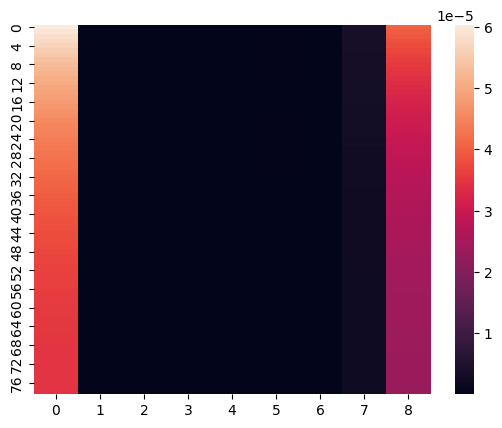

In [223]:
import seaborn as sns
set_stft_abs = np.abs(set_stft)
sns.heatmap(set_stft_abs[50:,:])


In [105]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36, 1000) (9, 1000) (36,) (9,)


In [106]:
model1 = Sequential()
model1.add(InputLayer((1000, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(3, 'sigmoid'))
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                16896     
                                                                 
 dense_11 (Dense)            (None, 8)                 520       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [110]:
cp = ModelCheckpoint('model1/', save_best_alone=True)
model1.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=0.0001), metrics='accuracy')
model1.fit(X_train, y_train,  validation_data=(X_test, y_test), epochs=30, callbacks=[cp])

Epoch 1/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 10s 6s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 6s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 8/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 6s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 9/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 10/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 11/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 12/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 13/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 6s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 14/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 15/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 16/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 6s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 17/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 18/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 6s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 19/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 20/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 21/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 6s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 22/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 23/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 24/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 25/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 26/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 6s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 27/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 28/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 29/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00
Epoch 30/30
2/2 [==============================] - ETA: 0s - loss: 2.2848e-07 - accuracy: 0.0000e+00

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


2/2 [==============================] - 6s 5s/step - loss: 2.2848e-07 - accuracy: 0.0000e+00 - val_loss: 2.7816e-07 - val_accuracy: 0.0000e+00


In [111]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train predictions':train_predictions, 'Actuals': y_train})
train_results

2/2 [==============================] - 1s 92ms/step


,Train predictions,Actuals
31,0.040409,2
29,0.040408,2
20,0.040409,3
41,0.040407,3
2,0.040422,1
43,0.040410,2
18,0.040410,1
15,0.040408,2
22,0.040409,2
16,0.040409,2
